In [1]:
## load data
%matplotlib inline
import imp
import pandas as pd
import numpy as np
import geopandas
from matplotlib import pyplot as plt
import seaborn

In [4]:
X_df = pd.read_csv('../data/interim/enhanced_restaurant_scores.csv')

In [7]:
X_df.head()

,Unnamed: 0,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,full_adress
0,0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,37.798473,-122.408648,NaN,NaN,69618_20190304,03/04/2019 12:00:00 AM,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk,1362 Stockton St San Francisco 94133 CA
1,1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782709,-122.474410,NaN,1.415724e+10,97975_20190725,07/25/2019 12:00:00 AM,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,1408 Clement St San Francisco 94118 CA
2,2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.787769,-122.404024,NaN,NaN,69487_20180418,04/18/2018 12:00:00 AM,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,1 Kearny St San Francisco 94108 CA
3,3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,37.724334,-122.434942,NaN,NaN,91044_20170818,08/18/2017 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN,4615 Mission St San Francisco 94112 CA
4,4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.786457,-122.413001,NaN,NaN,85987_20180412,04/12/2018 12:00:00 AM,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,552 Jones St San Francisco 94102 CA


In [8]:
X_df.isna().sum() / X_df.shape[0]

Unnamed: 0               0.000000
business_id              0.000000
business_name            0.000000
business_address         0.000000
business_city            0.000000
business_state           0.000000
business_postal_code     0.021974
business_latitude        0.000000
business_longitude       0.000000
business_location        0.490949
business_phone_number    0.672577
inspection_id            0.000000
inspection_date          0.000000
inspection_score         0.267393
inspection_type          0.000000
violation_id             0.254201
violation_description    0.254201
risk_category            0.254201
full_adress              0.021974
dtype: float64

In [9]:
# number of unique values
X_df.nunique()

Unnamed: 0               53973
business_id               6253
business_name             5775
business_address          5673
business_city                1
business_state               1
business_postal_code        62
business_latitude         3779
business_longitude        3783
business_location         2373
business_phone_number     1931
inspection_id            26663
inspection_date            813
inspection_score            47
inspection_type             15
violation_id             40210
violation_description       65
risk_category                3
full_adress               5589
dtype: int64

In [10]:
X_df.dtypes

Unnamed: 0                 int64
business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
business_postal_code      object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
full_adress               object
dtype: object

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


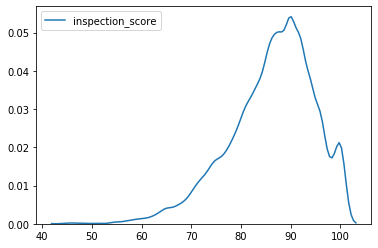

In [11]:
logRev = (X_df['inspection_score'])
seaborn.kdeplot(logRev)

In [12]:
X_df.dropna(subset=['business_latitude', 'business_longitude'], inplace=True)
X_df = X_df[(X_df['business_longitude'] <= -121.) & (X_df['business_latitude'] <= 37.84) & (X_df['business_latitude'] >= 37.70)]
X_df.head(4)

,Unnamed: 0,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,full_adress
0,0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,37.798473,-122.408648,NaN,NaN,69618_20190304,03/04/2019 12:00:00 AM,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk,1362 Stockton St San Francisco 94133 CA
1,1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782709,-122.474410,NaN,1.415724e+10,97975_20190725,07/25/2019 12:00:00 AM,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,1408 Clement St San Francisco 94118 CA
2,2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.787769,-122.404024,NaN,NaN,69487_20180418,04/18/2018 12:00:00 AM,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,1 Kearny St San Francisco 94108 CA
3,3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,37.724334,-122.434942,NaN,NaN,91044_20170818,08/18/2017 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN,4615 Mission St San Francisco 94112 CA


# Neighbourhoods

In [14]:
nbrhoods = geopandas.read_file("../data/external/geo_export_cef81227-9d5f-4ba8-9646-6a4e0ac30e0d.shp")

In [15]:
gdf = geopandas.GeoDataFrame(
    X_df, geometry=geopandas.points_from_xy(X_df.business_longitude, X_df.business_latitude))

No handles with labels found to put in legend.


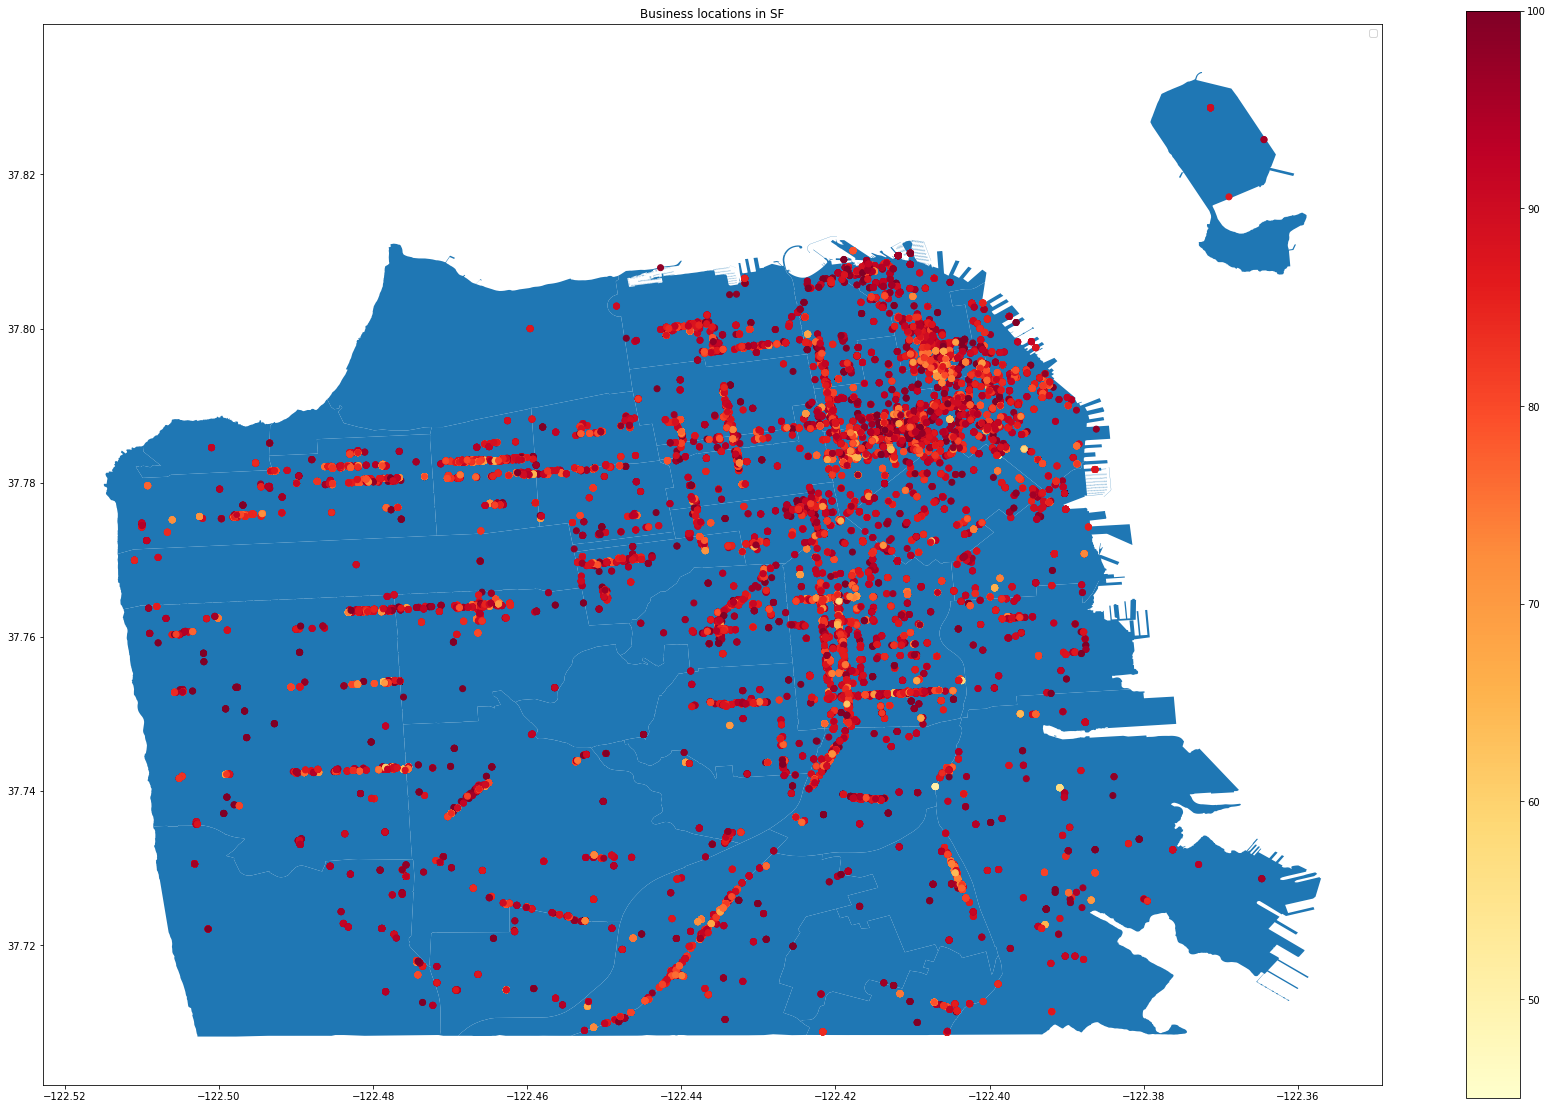

In [16]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = nbrhoods.plot(ax=ax)
# plotting business locations
gdf.plot(ax=base, marker="o", #color='darkred',
             column='inspection_score', cmap='YlOrRd', legend = True
             )
plt.legend()
ax.set_title("Business locations in SF")
plt.show()


# Notes scrappees sur TripAdvisor

In [18]:
X_trip = pd.read_csv('../data/external/tripadvisor_20200119_1453.csv', encoding = 'unicode_escape')

In [19]:
X_trip.head(1)

,number,link,date,name,rating,n_reviews,price_type,location,borough,price_range,cuisines,special_diets,meals,features,n_review_excellent,n_review_verygood,n_review_average,n_review_poor,n_review_terrible,list_reviews
0,0,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,Pier Market Seafood Restaurant,4.0,"[877, 681, 228, 65, 35]",mid_range,NaN,Fishermans Wharf,9 - 18,"American, Seafood","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Drinks","Parking Available, Validated Parking, Televisi...",877,681,228,65,35,['Located at Pier 39 its one of the places you...


In [20]:
X_trip['name'] = X_trip['name'].str.lower()
X_trip['name'] = X_trip['name'].str.replace('[^\w]','')
X_trip['name'] = X_trip['name'].apply(lambda s : ''.join(filter(str.isalpha, s)))

In [21]:
X_trip.head(5)

,number,link,date,name,rating,n_reviews,price_type,location,borough,price_range,cuisines,special_diets,meals,features,n_review_excellent,n_review_verygood,n_review_average,n_review_poor,n_review_terrible,list_reviews
0,0,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,piermarketseafoodrestaurant,4.0,"[877, 681, 228, 65, 35]",mid_range,NaN,Fishermans Wharf,9 - 18,"American, Seafood","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Drinks","Parking Available, Validated Parking, Televisi...",877,681,228,65,35,['Located at Pier 39 its one of the places you...
1,1,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,mersearestaurant,5.0,"[190, 10, 2, 1, 2]",mid_range,NaN,Treasure Island,5 - 16,"American, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch, Drinks","Takeout, Outdoor Seating, Seating, Parking Ava...",190,10,2,1,2,['Incredible food. World class views. Delightf...
2,2,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,eightam,4.5,"[720, 178, 38, 9, 5]",mid_range,NaN,Fishermans Wharf,NaN,NaN,NaN,NaN,NaN,720,178,38,9,5,['We visited 8am twice on our 4 day stay at Fi...
3,3,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,quince,4.5,"[356, 78, 29, 20, 11]",fine_dining,NaN,North Beach / Telegraph Hill,NaN,NaN,NaN,NaN,NaN,356,78,29,20,11,['The genuine care from every staff member was...
4,4,https://www.tripadvisor.com/Restaurant_Review-...,20200119_1453,kokkariestiatorio,4.5,"[1824, 459, 112, 22, 13]",fine_dining,NaN,North Waterfront/Embarcadero,22 - 72,"Mediterranean, Greek","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Reservations, Private Dining, Seating, Valet P...",1824,459,112,22,13,['Definitely the place to people watch. The sp...


In [22]:
X_df['business_name'] = X_df['business_name'].str.lower()
X_df['business_name'] = X_df['business_name'].str.replace('[^\w]','')
X_df['business_name'] = X_df['business_name'].apply(lambda s : ''.join(filter(str.isalpha, s)))

In [23]:
X_trip['name'].isin(X_df['business_name']).sum()

1784

In [24]:
X_trip.shape[0]

4929

In [54]:
merged = X_df.merge(X_trip, left_on='business_name', right_on='name')

In [55]:
merged.head()

,Unnamed: 0,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,...,cuisines,special_diets,meals,features,n_review_excellent,n_review_verygood,n_review_average,n_review_poor,n_review_terrible,list_reviews
0,1,97975,breadbelly,1408 Clement St,San Francisco,CA,94118,37.782709,-122.474410,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,['My daughter heard about this place and was e...
1,4786,97975,breadbelly,1408 Clement St,San Francisco,CA,94118,37.782709,-122.474410,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,['My daughter heard about this place and was e...
2,8252,97975,breadbelly,1408 Clement St,San Francisco,CA,94118,37.782709,-122.474410,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,['My daughter heard about this place and was e...
3,12790,97975,breadbelly,1408 Clement St,San Francisco,CA,94118,37.782709,-122.474410,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,['My daughter heard about this place and was e...
4,4,85987,tselogs,552 Jones St,San Francisco,CA,94102,37.786457,-122.413001,NaN,...,"Filipino, Asian",NaN,"Lunch, Dinner",NaN,15,8,2,0,0,['Cons first whoever man who picked up my pho...


In [56]:
gdf_merge = geopandas.GeoDataFrame(
    merged, geometry=geopandas.points_from_xy(merged.business_longitude, merged.business_latitude))

No handles with labels found to put in legend.


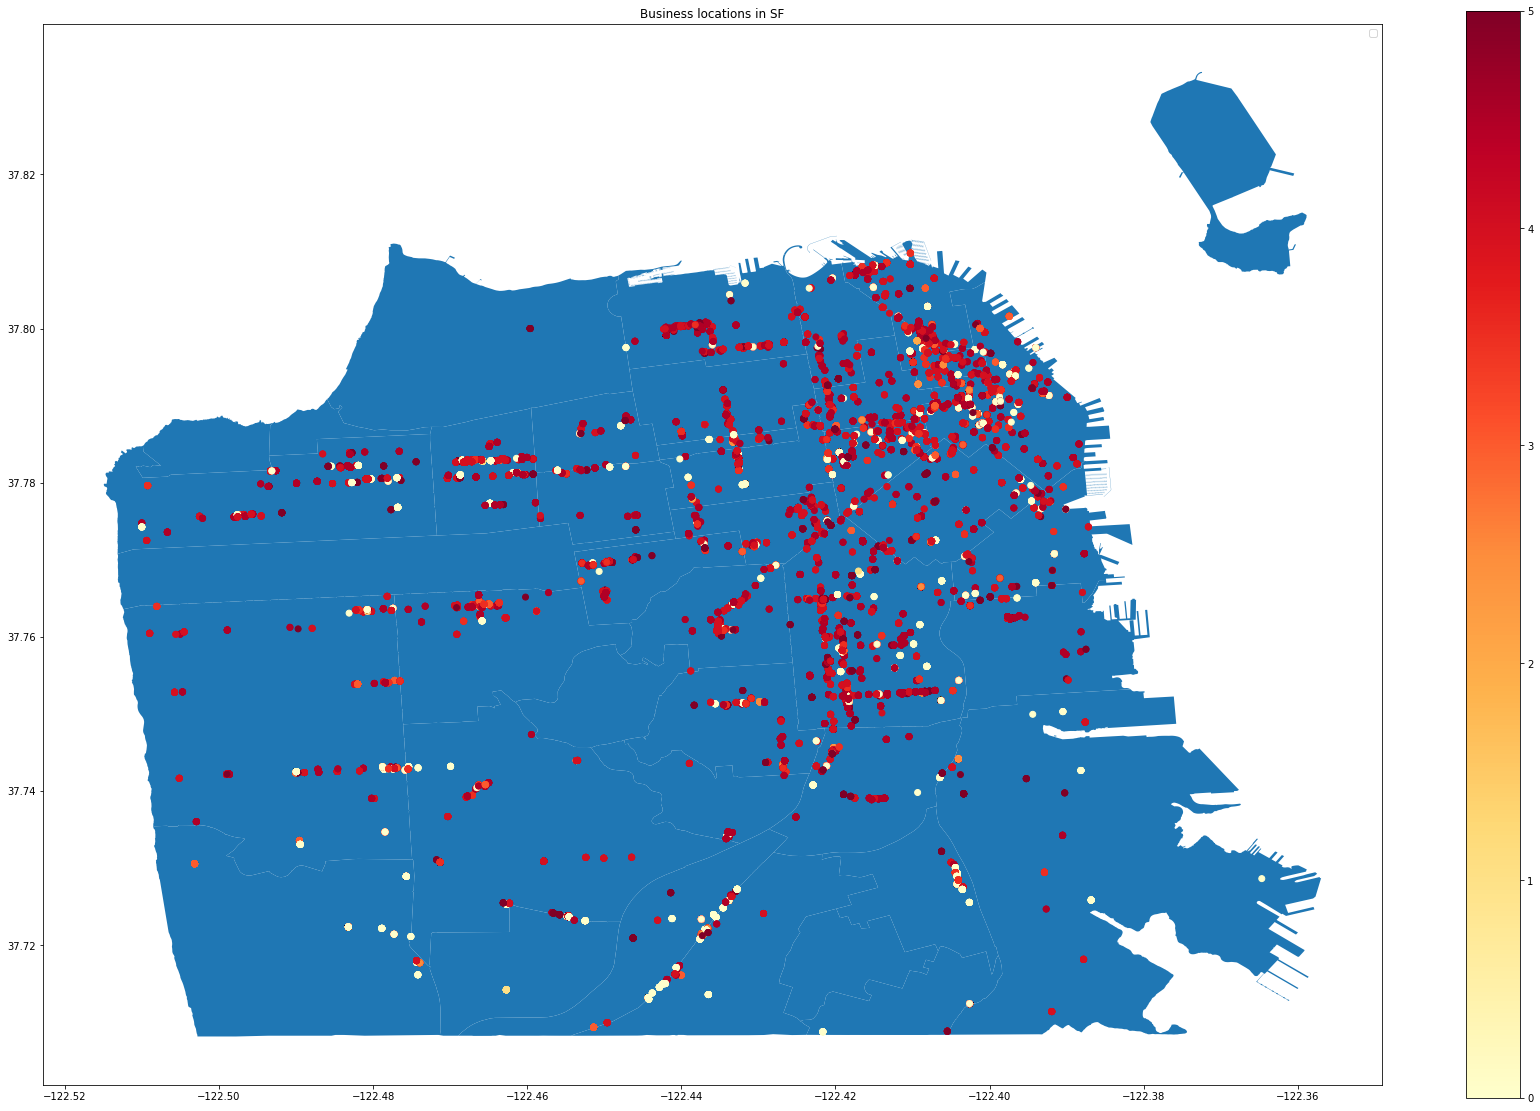

In [57]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = nbrhoods.plot(ax=ax)
# plotting business locations
gdf_merge.plot(ax=base, marker="o", #color='darkred',
             column='rating', cmap='YlOrRd', legend = True
             )
plt.legend()
ax.set_title("Business locations in SF")
plt.show()


# Analyse des donnees

In [58]:
merged = merged[merged['inspection_score'].notna()]

In [59]:
merged.head(1)

,Unnamed: 0,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,...,cuisines,special_diets,meals,features,n_review_excellent,n_review_verygood,n_review_average,n_review_poor,n_review_terrible,list_reviews
0,1,97975,breadbelly,1408 Clement St,San Francisco,CA,94118,37.782709,-122.47441,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,['My daughter heard about this place and was e...


In [60]:
merged.isna().sum() / merged.shape[0]

Unnamed: 0               0.000000
business_id              0.000000
business_name            0.000000
business_address         0.000000
business_city            0.000000
business_state           0.000000
business_postal_code     0.000000
business_latitude        0.000000
business_longitude       0.000000
business_location        0.397958
business_phone_number    0.662495
inspection_id            0.000000
inspection_date          0.000000
inspection_score         0.000000
inspection_type          0.000000
violation_id             0.019021
violation_description    0.019021
risk_category            0.019021
full_adress              0.000000
geometry                 0.000000
number                   0.000000
link                     0.000000
date                     0.000000
name                     0.000000
rating                   0.000000
n_reviews                0.000000
price_type               0.330141
location                 1.000000
borough                  0.007410
price_range   

In [61]:
merged.nunique()

Unnamed: 0               12666
business_id               1555
business_name             1349
business_address          1532
business_city                1
business_state               1
business_postal_code        28
business_latitude         1398
business_longitude        1402
business_location          740
business_phone_number      499
inspection_id             3795
inspection_date            718
inspection_score            43
inspection_type              1
violation_id             12436
violation_description       62
risk_category                3
full_adress               1534
geometry                  1403
number                    1690
link                      1644
date                       117
name                      1349
rating                      10
n_reviews                  969
price_type                   4
location                     0
borough                    169
price_range                116
cuisines                   336
special_diets               19
meals   

In [70]:
merged.dtypes

Unnamed: 0                  int64
business_id                 int64
business_name              object
business_address           object
business_city              object
business_state             object
business_postal_code       object
business_latitude         float64
business_longitude        float64
business_location          object
business_phone_number     float64
inspection_id              object
inspection_date            object
inspection_score          float64
inspection_type            object
violation_id               object
violation_description      object
risk_category              object
full_adress                object
geometry                 geometry
number                      int64
link                       object
date                       object
name                       object
rating                    float64
n_reviews                  object
price_type                 object
location                  float64
borough                    object
price_range   

### types de cuisines sur la map

In [62]:
gdf_merge = geopandas.GeoDataFrame(
    merged, geometry=geopandas.points_from_xy(merged.business_longitude, merged.business_latitude))

In [64]:
from sklearn import preprocessing
merged.loc[merged['cuisines'].isna(), 'cuisines'] = 'None'
le = preprocessing.LabelEncoder()
le.fit(merged['cuisines'].dropna())


LabelEncoder()

In [65]:
merged['cuisines_label'] = le.transform(merged['cuisines']) 

No handles with labels found to put in legend.


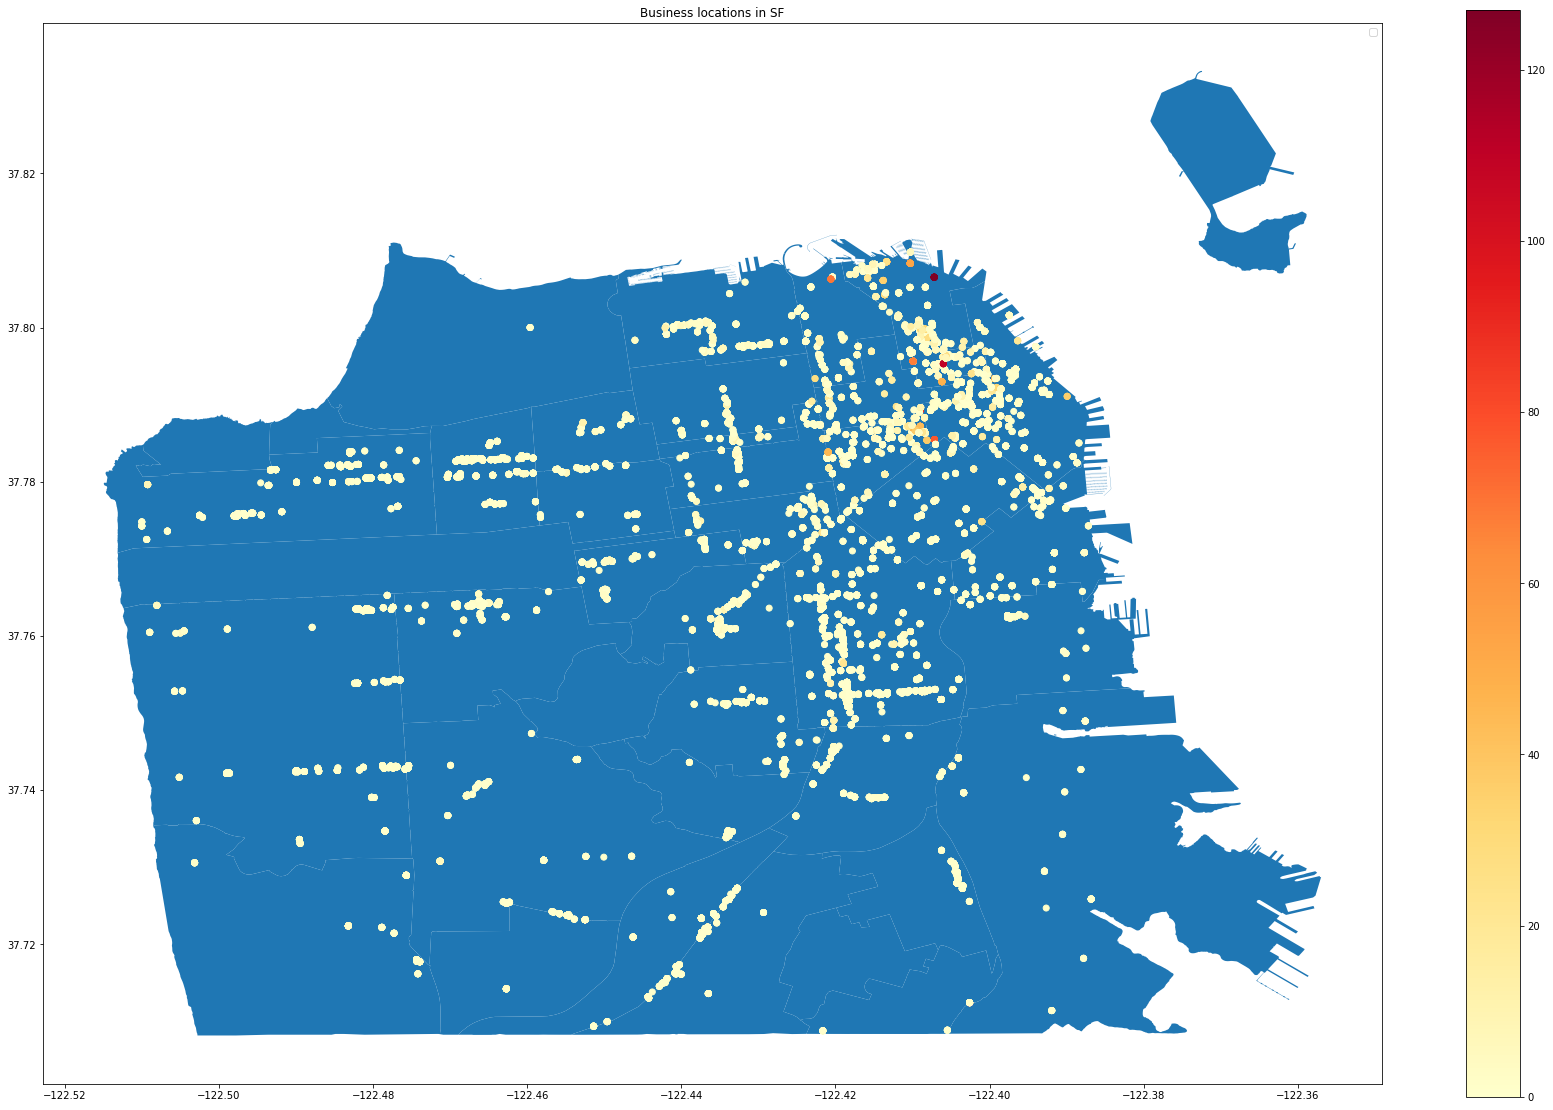

In [73]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = nbrhoods.plot(ax=ax)
# plotting business locations
gdf_merge.plot(ax=base, marker="o", #color='darkred',
             column='n_review_terrible', cmap ='YlOrRd', legend = True
             )
plt.legend()
ax.set_title("Business locations in SF")
plt.show()


# Model de base

## Pipelines

1. process numerical values

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median'))
])

2. transform all the categorical variables into 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

zipcode_col = ['Zipcode']
date_cols = ['Fiscal_year_end_date']
drop_cols = ['business_name','business_address','business_city', 'business_state', 'inspection_score']

APE_col = ['Activity_code (APE)']


preprocessor_comp = ColumnTransformer(
    transformers=[
        ('zipcode', make_pipeline(zipcode_transformer, SimpleImputer(strategy='median')), zipcode_col),
        ('num', numeric_transformer, num_cols),
        ('date', make_pipeline(date_transformer, SimpleImputer(strategy='median')), date_cols),
        ('APE', make_pipeline(APE_transformer, SimpleImputer(strategy='median')), APE_col),
        ('drop cols', 'drop', drop_cols),
    ])


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor

cv = GroupShuffleSplit(n_splits=8, test_size=0.25)

In [30]:
reg = RandomForestRegressor(n_estimators=10, max_depth=20)

In [31]:
merged = merged[merged['inspection_score'].notna()]

In [32]:
X_array = merged.drop(, axis = 1)

In [33]:
y_array = merged['inspection_score']

In [ ]:
reg.fit(X_array, y_array)

In [ ]:
for col in merged.columns: 
    print(col) 